# Machine Learning for Time Series Data in Python

## Chapter 3: Predicting Time Series Data

In [29]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [19]:
stock_prices = pd.read_csv("prices.csv")
list_select_symbols = ["EBAY", "YHOO"]
list_select_columns = ["date", "symbol", "close"]
date_start = "2010-01-04"
date_end = "2015-01-30"

prices_select = stock_prices[stock_prices["symbol"].isin(list_select_symbols)][list_select_columns]
prices_select["date"] = pd.to_datetime(prices_select["date"])
date_mask = ((prices_select["date"] >= date_start) & (prices_select["date"] <= date_end))

prices_select = prices_select.loc[date_mask]
prices_select

,date,symbol,close
12,2010-01-04,EBAY,23.900000
45,2010-01-04,YHOO,17.100000
58,2010-01-05,EBAY,23.650000
91,2010-01-05,YHOO,17.230000
104,2010-01-06,EBAY,23.500000
...,...,...,...
60793,2015-01-28,YHOO,46.459999
60806,2015-01-29,EBAY,53.959999
60842,2015-01-29,YHOO,43.730000
60855,2015-01-30,EBAY,52.999996


In [20]:
prices = prices_select.pivot(index="date", columns="symbol", values="close")
prices

symbol,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001
...,...,...
2015-01-26,56.059999,49.439999
2015-01-27,54.690000,47.990002
2015-01-28,53.839999,46.459999


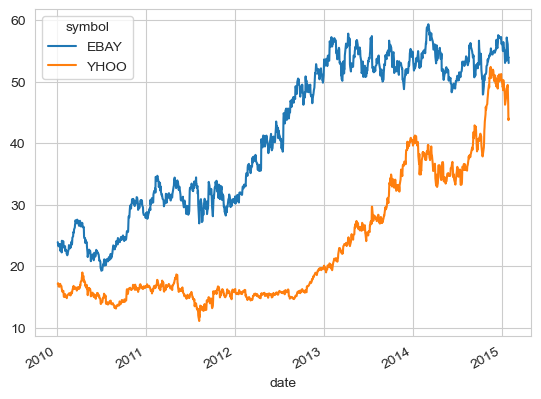

In [21]:
# Plot the raw values over time
prices.plot()
plt.show()

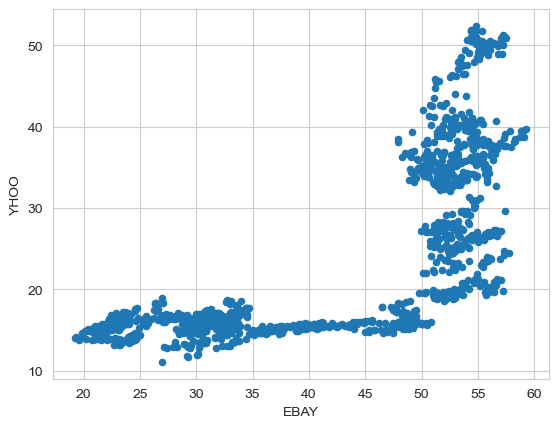

In [22]:
# Scatterplot with one company per axis
prices.plot.scatter(x="EBAY", y="YHOO")
plt.show()

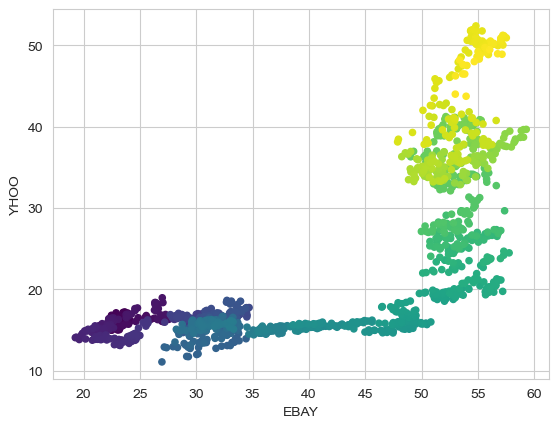

In [23]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index,
                    cmap=plt.cm.viridis, colorbar=False)
plt.show()

In [25]:
prices_all_select = stock_prices[list_select_columns].copy()
prices_all_select["date"] = pd.to_datetime(prices_all_select["date"])
date_mask = ((prices_all_select["date"] >= date_start) & (prices_all_select["date"] <= date_end))

prices_all_select = prices_all_select.loc[date_mask]

all_prices = prices_all_select.pivot(index="date", columns="symbol", values="close")
all_prices

symbol,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,...,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.300000,16.650013,15.690000,9.01,3.400000,28.090001,16.969999,...,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.190000,16.130013,16.200001,9.04,3.530000,28.970002,16.740000,...,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.160000,16.970013,16.389999,9.16,3.640000,28.650002,16.620001,...,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.010000,16.610014,16.930000,9.09,3.650000,28.720002,16.969999,...,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.550000,17.020014,16.780001,9.00,3.590000,28.910002,16.920000,...,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-26,113.099998,44.150002,51.209999,24.240000,16.080012,15.850000,14.96,48.889999,20.139999,56.689999,...,72.610001,9.08,88.120003,33.180000,256.529999,46.959999,53.580002,91.760002,13.74,49.439999
2015-01-27,109.139999,43.680000,50.470001,23.570000,15.920012,15.630000,14.74,48.310001,20.250000,56.360001,...,71.769997,8.97,88.339996,32.810001,250.990005,46.349998,52.970001,90.949997,13.57,47.990002
2015-01-28,115.309998,43.410000,49.209999,23.379999,15.800012,15.200000,14.59,47.110001,19.129999,54.590000,...,70.989998,8.74,87.570000,32.680000,246.360001,46.049999,52.160000,87.949997,13.24,46.459999


In [27]:
# Use stock symbols to extract training data
X = all_prices[["EBAY", "NVDA", "YHOO"]]
y = all_prices[["AAPL"]]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


In [34]:
X = X.to_numpy()
y = y.to_numpy()

In [35]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, shuffle=False)

# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-0.33806972562289306


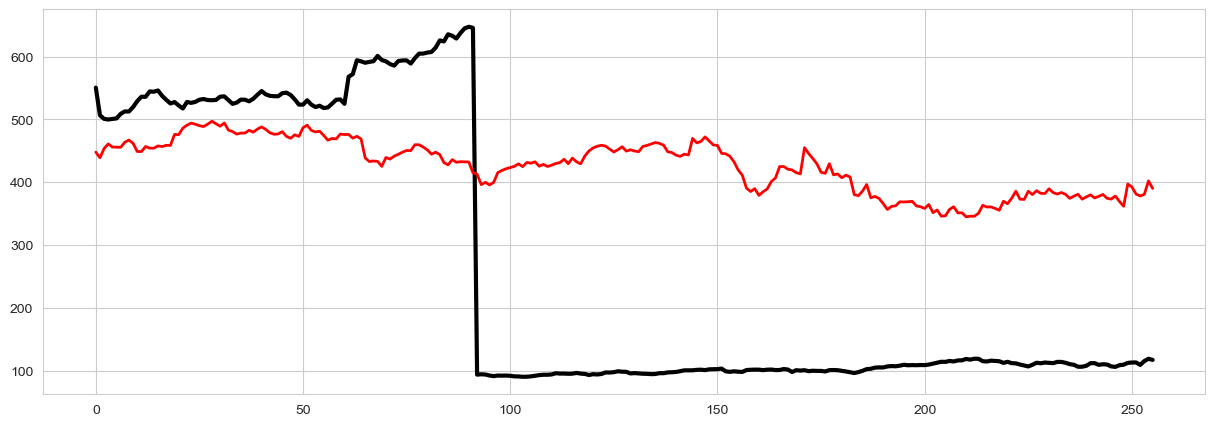

In [36]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

In [44]:
prices = pd.read_csv("prices_null.csv")

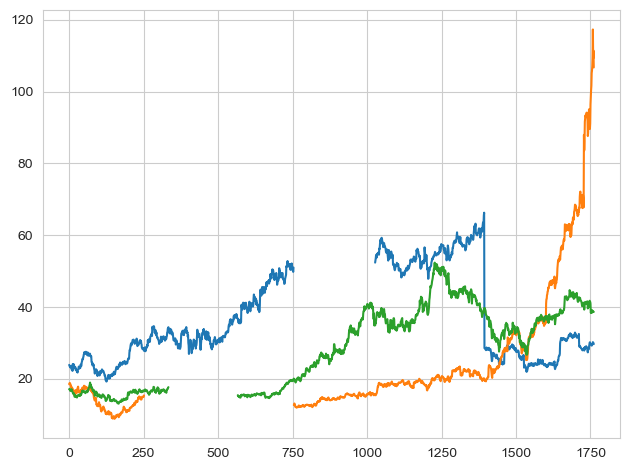

date      0
EBAY    273
NVDA    502
YHOO    232
dtype: int64


In [45]:
# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

In [ ]:
# Create a function we'll use to interpolate and plot
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for missing values
    missing_values = prices.isna()

    # Interpolate the missing values
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in black
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)

    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

In [2]:
normal = pd.read_csv("normal_sound.csv", index_col=0)
abnormal = pd.read_csv("abnormal_sound.csv", index_col=0)
sfreq = 2205

In [3]:
normal

,3,4,6
time,,,
0.000000,-0.000995,0.000281,0.002953
0.000454,-0.003381,0.000381,0.003034
0.000907,-0.000948,0.000063,0.000292
0.001361,-0.000766,0.000026,-0.005916
0.001814,0.000469,-0.000432,-0.005307
...,...,...,...
3.997732,-0.000089,-0.005931,0.002474
3.998186,-0.000112,-0.004839,0.004467
3.998639,-0.000233,-0.000591,0.016809


In [4]:
abnormal

,0,1,2
time,,,
0.000000,-0.024684,-0.024507,0.008254
0.000454,-0.060429,-0.047736,0.014809
0.000907,-0.070080,-0.039938,0.010475
0.001361,-0.084212,-0.041199,0.010272
0.001814,-0.085111,-0.036050,0.008580
...,...,...,...
3.997732,0.010513,-0.401539,0.138510
3.998186,0.009675,-0.360107,0.134382
3.998639,0.007957,-0.317170,0.124178


In [5]:
def show_plot_and_make_titles():
    axs[0, 0].set(title="Normal Heartbeats")
    axs[0, 1].set(title="Abnormal Heartbeats")
    plt.tight_layout()

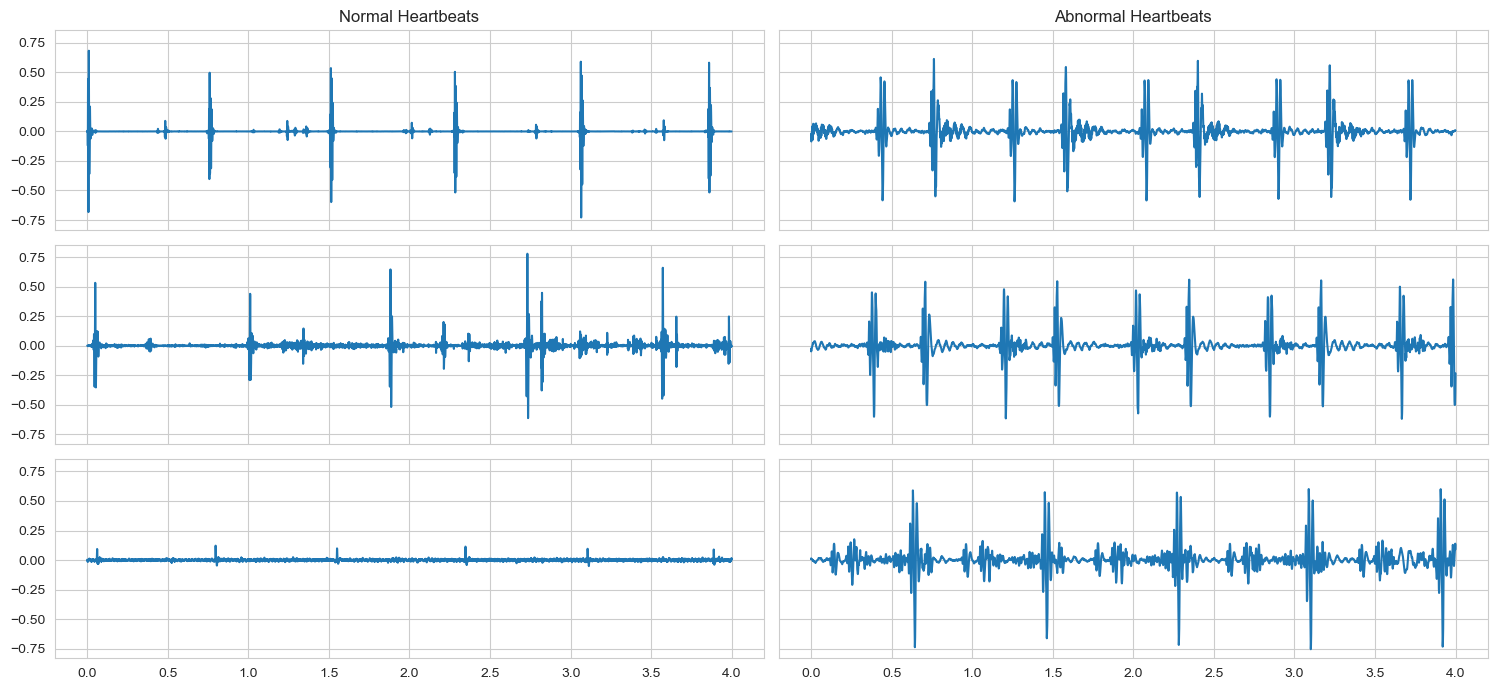

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

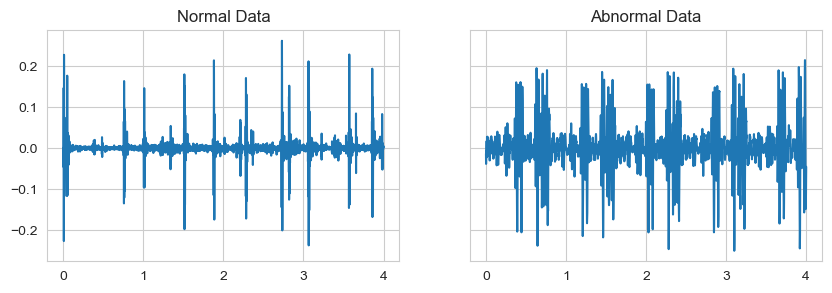

In [7]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)

# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

In [8]:
normal = pd.read_csv("heart_normal.csv", index_col=0)
abnormal = pd.read_csv("heart_abnormal.csv", index_col=0)

In [9]:
normal_train_idx = np.random.choice(normal.shape[1], size=22, replace=False).tolist()
normal_test_idx = list(set(np.arange(normal.shape[1]).tolist()) - set(normal_train_idx))

abnormal_train_idx = np.random.choice(abnormal.shape[1], size=20, replace=False).tolist()
abnormal_test_idx = list(set(np.arange(abnormal.shape[1]).tolist()) - set(abnormal_train_idx))

X_train = pd.concat([normal.iloc[:, normal_train_idx], 
                     abnormal.iloc[:, abnormal_train_idx]], axis=1).to_numpy().T
X_test = pd.concat([normal.iloc[:, normal_test_idx], 
                    abnormal.iloc[:, abnormal_test_idx]], axis=1).to_numpy().T

y_train = np.array(['normal'] * len(normal_train_idx) + ['abnormal'] * len(abnormal_train_idx))
y_test = np.array(['normal'] * len(normal_test_idx) + ['abnormal'] * len(abnormal_test_idx))

In [10]:
# Initialize and fit the model
model = LinearSVC(dual="auto")
model.fit(X_train, y_train)

# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

0.5


In [11]:
normal = pd.read_csv("normal_sound.csv", index_col=0)
abnormal = pd.read_csv("abnormal_sound.csv", index_col=0)
sfreq = 2205
time = np.arange(normal.shape[0]) / sfreq
print(normal.shape, normal.columns)
print(abnormal.shape, abnormal.columns)

(8820, 3) Index(['3', '4', '6'], dtype='object')
(8820, 3) Index(['0', '1', '2'], dtype='object')


In [12]:
audio = abnormal["0"].iloc[0: sfreq]

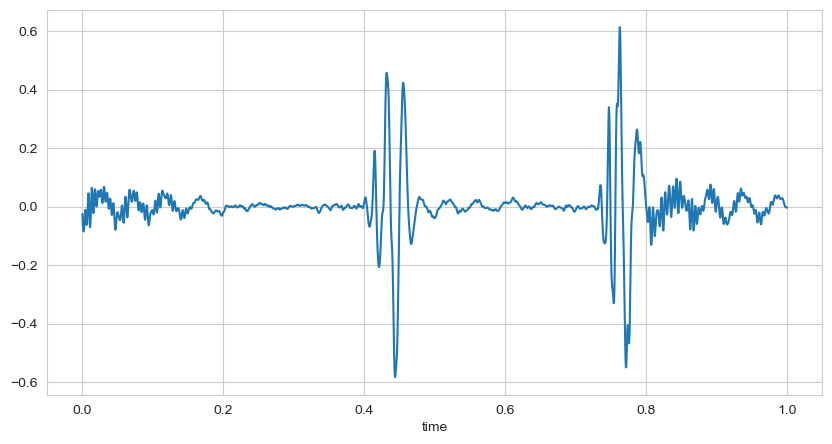

In [13]:
# Plot the raw data first
audio.plot(figsize=(10, 5))
plt.show()

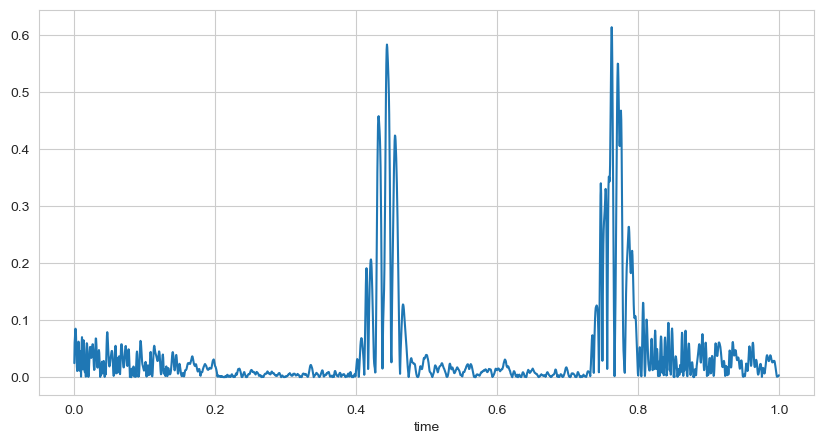

In [14]:
# Rectify the audio signal
audio_rectified = audio.apply(abs)

# Plot the result
audio_rectified.plot(figsize=(10, 5))
plt.show()

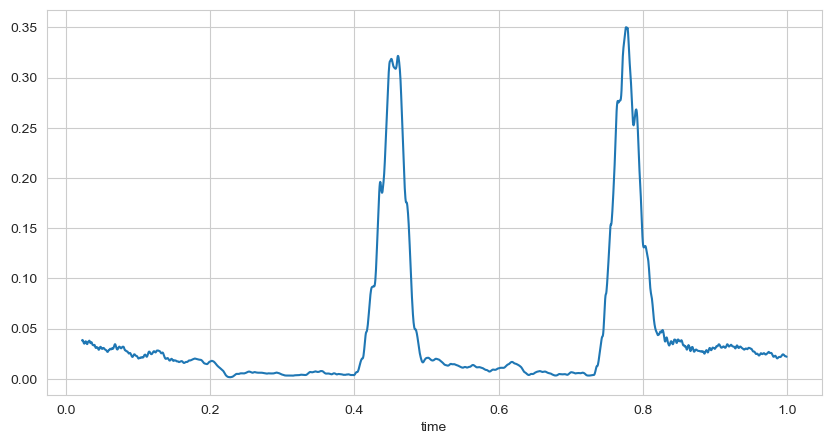

In [15]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(10, 5))
plt.show()

In [16]:
# List all the wav files in the folder
data_dir = r"D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a"
all_audio_files = glob(data_dir + r"/*.wav")

df_audio_files = pd.DataFrame(all_audio_files, columns=["full_path"])

df_audio_files["file_name"] = df_audio_files["full_path"].apply(os.path.basename)
df_audio_files["prefix"] = df_audio_files["file_name"].str.extract(r"^(.*)__.*.wav")
df_audio_files["date_time_string"] = df_audio_files["file_name"].str.extract(r".*__(\d*).wav")
df_audio_files["date_time"] = pd.to_datetime(df_audio_files["date_time_string"], format="%Y%m%d%H%M")

df_normal_murmur = df_audio_files[df_audio_files["prefix"].str.contains("normal|murmur")].copy()
df_normal_murmur

,full_path,file_name,prefix,date_time_string,date_time
111,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051104.wav,murmur,201101051104,2011-01-05 11:04:00
112,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051108.wav,murmur,201101051108,2011-01-05 11:08:00
113,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101051114.wav,murmur,201101051114,2011-01-05 11:14:00
114,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201101180902.wav,murmur,201101180902,2011-01-18 09:02:00
115,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,murmur__201102051443.wav,murmur,201102051443,2011-02-05 14:43:00
...,...,...,...,...,...
171,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201106221450.wav,normal,201106221450,2011-06-22 14:50:00
172,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011112.wav,normal,201108011112,2011-08-01 11:12:00
173,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011114.wav,normal,201108011114,2011-08-01 11:14:00
174,D:/GitHub/data-sets/datacamp/kaggle-heartbeat-...,normal__201108011115.wav,normal,201108011115,2011-08-01 11:15:00


In [18]:
list_audio_files = df_normal_murmur["full_path"].to_list()
list_audio_files

['D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201101051104.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201101051108.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201101051114.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201101180902.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201102051443.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201102052338.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201103291548.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201104021355.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201104241315.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201104291843.wav',
 'D:/GitHub/data-sets/datacamp/kaggle-heartbeat-sounds/set_a\\murmur__201106141148.wav',
 'D:/GitHub/data-sets

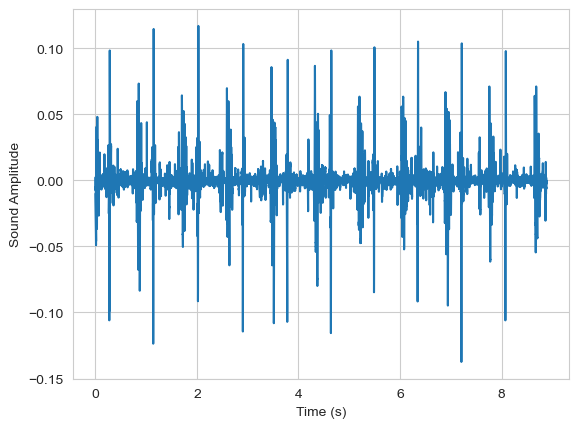

In [19]:
# Read in the first audio file, create the time array
audio, sfreq = lr.load(list_audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

In [39]:
n_rows = 8821

list_df_audio = []

for idx, audio_file in enumerate(list_audio_files):

    audio, _ = lr.load(audio_file)
    
    list_df_audio.append(pd.DataFrame({idx: audio[:n_rows]}))

df_audio = pd.concat(list_df_audio, axis=1)
df_audio["time"] = time[:n_rows]
df_audio.set_index("time", inplace=True)
df_audio

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
time,,,,,,,,,,,,,,,,,,,,,
0.000000,-0.005357,-0.002045,0.038044,-0.043799,0.001137,0.008228,0.102528,-0.000617,-0.000299,0.001095,...,-0.514670,-0.001504,0.000589,-0.000299,0.001022,0.000751,0.007115,0.011415,0.002579,-0.002238
0.000045,-0.007478,-0.003040,0.054174,-0.063318,0.001946,0.011647,0.149441,-0.001027,0.000111,0.001079,...,-0.744141,-0.001342,0.000636,-0.000327,0.002219,0.000894,0.011339,0.018149,0.004154,-0.003588
0.000091,-0.006126,-0.002905,0.046007,-0.055245,-0.000047,0.009692,0.132231,0.000346,0.000887,0.000093,...,-0.648609,-0.000780,0.001388,-0.001510,0.004346,0.000573,0.010707,0.017104,0.004096,-0.003312
0.000136,-0.006206,-0.003173,0.048441,-0.059632,-0.002237,0.010811,0.143339,0.000137,0.002297,0.000106,...,-0.696105,-0.000633,0.001141,-0.004795,0.004394,0.000397,0.011348,0.018166,0.004525,-0.003426
0.000181,-0.005352,-0.002950,0.044804,-0.055607,-0.003318,0.010580,0.134752,-0.000392,0.002734,0.001719,...,-0.643686,-0.001463,0.001177,-0.005356,0.005354,0.000507,0.010282,0.016535,0.004388,-0.002955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.399819,-0.001688,0.000409,-0.072832,-0.035688,0.001671,0.046097,0.162018,-0.002503,-0.006622,-0.000714,...,-0.049902,0.000183,-0.000425,-0.041613,0.024215,-0.030599,-0.000052,0.001930,0.015878,-0.015267
0.399864,-0.001690,0.000086,-0.073732,-0.036081,0.001519,0.041580,0.160045,-0.003619,-0.006353,-0.001202,...,-0.049480,0.000286,0.000052,-0.044619,0.023509,-0.031298,0.000071,0.002100,0.015847,-0.015677
0.399909,-0.001710,-0.000075,-0.072461,-0.036431,0.001430,0.037761,0.158256,-0.004879,-0.006994,-0.001743,...,-0.048740,-0.001696,0.000574,-0.048911,0.023061,-0.032045,0.000235,0.002294,0.015830,-0.016049


In [42]:
audio = df_audio.copy()
audio_rectified = audio.apply(abs)
audio_rectified_smooth = audio_rectified.rolling(50).mean()
labels = df_normal_murmur["prefix"].to_numpy()

print(audio.shape)
print(audio_rectified.shape)
print(audio_rectified_smooth.shape)
print(labels.shape)

(8821, 65)
(8821, 65)
(8821, 65)
(65,)


In [46]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.6615384615384615


In [51]:
# Calculate the tempo of the sounds
sfreq = 2205
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.feature.tempogram(y=i_audio.values, sr=sfreq, hop_length=2**6))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

In [52]:
# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

In [54]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.6615384615384615


E:\Anaconda3\envs\dc-statistics\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\Anaconda3\envs\dc-statistics\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [79]:
n_rows = 88210

# Read in the first audio file, create the time array
audio, sfreq = lr.load(list_audio_files[0])
time = np.arange(0, len(audio)) / sfreq

audio = audio[0: n_rows]
time = time[0: n_rows]

# Prepare the STFT
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

print(spec.shape)

(65, 5514)


C:\Users\rpitc\AppData\Local\Temp\ipykernel_19256\1770969355.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_db = amplitude_to_db(spec)


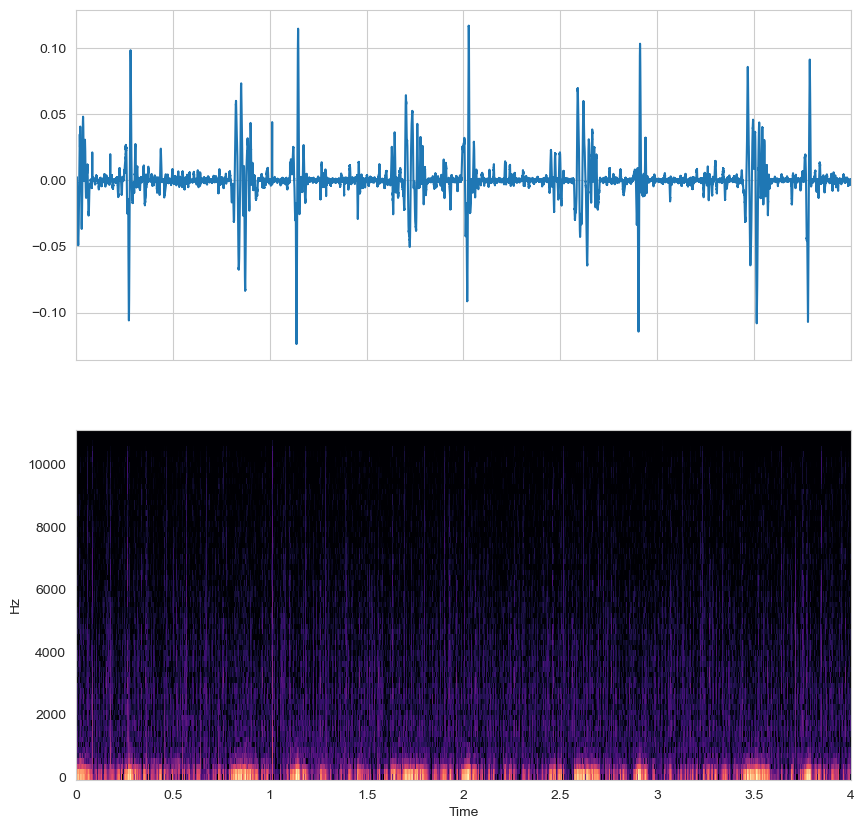

In [70]:
# Convert into decibels
spec_db = amplitude_to_db(spec)

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=axs[1])
plt.show()

In [81]:
# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=abs(spec))[0]
centroids = lr.feature.spectral_centroid(S=abs(spec))[0]

C:\Users\rpitc\AppData\Local\Temp\ipykernel_19256\1943501974.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spec_db = amplitude_to_db(spec)


NameError: name 'times_spec' is not defined

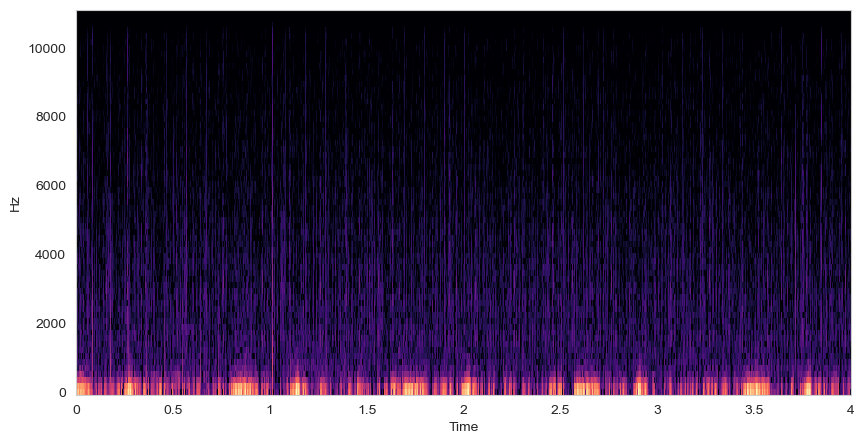

In [82]:
# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()

In [83]:
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)
    centroids.append(this_mean_centroid)

NameError: name 'spectrograms' is not defined

In [ ]:
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape(-1, 1)

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))